In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import yoda
yoda.__file__

'/cvmfs/atlas.cern.ch/repo/sw/software/23.6/sw/lcg/releases/MCGenerators/yoda/1.9.8-38789/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/yoda/__init__.py'

In [2]:
root_path = '/sdf/group/ldmx/users/dongyi/data/'
Event = '/Events/run_01/'
DATA='/ATLAS_2017_I1495243'
yoda_suff = '.yoda'
figure_pre = '/HEPData-ins1495243-v2-Figure_'
figure_type=['4a', '4b', '4c', '4d', '6a', '6b'] # 4a, b, c, d, are pT>25, 40, 60, 80; 6a, b are leading b jet and sub leading b jet
figure_no = ['/d01-x01-y01', '/d02-x01-y01', '/d03-x01-y01', '/d04-x01-y01', '/d05-x01-y01', '/d06-x01-y01']
plot_title = ['Multiplicity of additional jets with pt>25GeV', 'Multiplicity of additional jets with pt>40GeV', 'Multiplicity of additional jets with pt>60GeV', \
         'Multiplicity of additional jets with pt>80GeV', 'pT for leading b jet', 'pT for sub leading b jet'] 
plot_name = ['ajet_pT25', 'ajet_pT40', 'ajet_pT60', 'ajet_pT80', 'lead_bjet', 'sub_lead_bjet']
#xtitle=[r'$p_T^{ajet}$[GeV]', r'$p_T^{ajet}$[GeV]', r'$p_T^{ajet}$[GeV]', r'$p_T^{ajet}$[GeV]', r'$p_T^{lead_b_jet}$[GeV]']

plot_path = root_path + 'JO_plots/NLO_5m' + DATA + '/' + plot_name[0] + '.png'
NLO_file  = root_path+'BATCH'+'/NLO_5m_ATLAS_CMS'+yoda_suff
print(NLO_file)
print(plot_path)

/sdf/group/ldmx/users/dongyi/data/BATCH/NLO_5m_ATLAS_CMS.yoda
/sdf/group/ldmx/users/dongyi/data/JO_plots/NLO_5m/ATLAS_2017_I1495243/ajet_pT25.png


In [6]:
def plotting(datax, datay, data_xerr, data_yerr, NLO_5m, NLO_yerr, DELTA_5m, DELTA_yerr, title, plot_path):
    xEdges = np.append(np.append(1.5*datax[0] - datax[1]*.5, [(datax[i] + datax[i+1])*.5 for i in range(len(datax)-1)]), 1.5*datax[-1]-.5*datax[-2])
    fig, axs = plt.subplots(3, 1, sharex=True, gridspec_kw={'height_ratios':[3, 1, 1]}, figsize=(10,8))
    fig.subplots_adjust(hspace=0)
    axs[0].errorbar(datax, NLO_5m, color = 'red', marker='o', linestyle='none', xerr=data_xerr, yerr=NLO_yerr, label='NLO_5m')
    axs[0].errorbar(datax, DELTA_5m, color = 'green', marker='o', linestyle='none', xerr=data_xerr, yerr=DELTA_yerr, label='NLO_DELTA_5m')
    axs[0].errorbar(datax, datay, marker='o', linestyle='none', xerr=data_xerr, yerr=data_yerr, label='DATA')
    axs[0].legend()
    axs[0].set_xlim(min(xEdges), max(xEdges))
    axs[0].set_yscale('log')
    axs[0].set_title(title)
    
    axs[1].stairs(NLO_5m/datay, xEdges, color='red')
    axs[1].stairs(DELTA_5m/datay, xEdges, color='green')
    axs[1].plot(xEdges, np.ones(len(xEdges)), '--')
    axs[1].fill_between(xEdges, np.ones(len(xEdges))+np.append(data_yerr/datay,0),np.ones(len(xEdges))-np.append(data_yerr/datay,0), color='blue', alpha=0.2, step='post', label='DATA')
    axs[1].set_ylabel('MC/DATA', fontsize=6)
    #axs[1].set_ylim(0.8, 1.2)
    axs[1].legend(bbox_to_anchor=(.99, 1.05))


    axs[2].stairs(DELTA_5m/NLO_5m, xEdges, color='blue')
    axs[2].plot(xEdges, np.ones(len(xEdges)), 'g--')
    axs[2].fill_between(xEdges, np.ones(len(xEdges))+np.append(DELTA_yerr/DELTA_5m,0),np.ones(len(xEdges))-np.append(DELTA_yerr/DELTA_5m,0), color='green', alpha=0.2, step='post', label='MC')
    axs[2].set_ylabel('DELTA/NLO', fontsize=6)
    axs[2].set_xlabel('pT[GeV]')
    axs[2].legend(bbox_to_anchor=(.99, 1.05))
    #axs[2].set_ylim(0.9, 1.1)

    fig.savefig(plot_path, bbox_inches='tight', dpi=200)


/sdf/group/ldmx/users/dongyi/data/NLO_1k/Events/run_01//ATLAS_2017_I1495243/HEPData-ins1495243-v2-Figure_4a.yoda
/sdf/group/ldmx/users/dongyi/data/NLO_1k/Events/run_01//ATLAS_2017_I1495243/HEPData-ins1495243-v2-Figure_4b.yoda
/sdf/group/ldmx/users/dongyi/data/NLO_1k/Events/run_01//ATLAS_2017_I1495243/HEPData-ins1495243-v2-Figure_4c.yoda
/sdf/group/ldmx/users/dongyi/data/NLO_1k/Events/run_01//ATLAS_2017_I1495243/HEPData-ins1495243-v2-Figure_4d.yoda
/sdf/group/ldmx/users/dongyi/data/NLO_1k/Events/run_01//ATLAS_2017_I1495243/HEPData-ins1495243-v2-Figure_6a.yoda
/sdf/group/ldmx/users/dongyi/data/NLO_1k/Events/run_01//ATLAS_2017_I1495243/HEPData-ins1495243-v2-Figure_6b.yoda


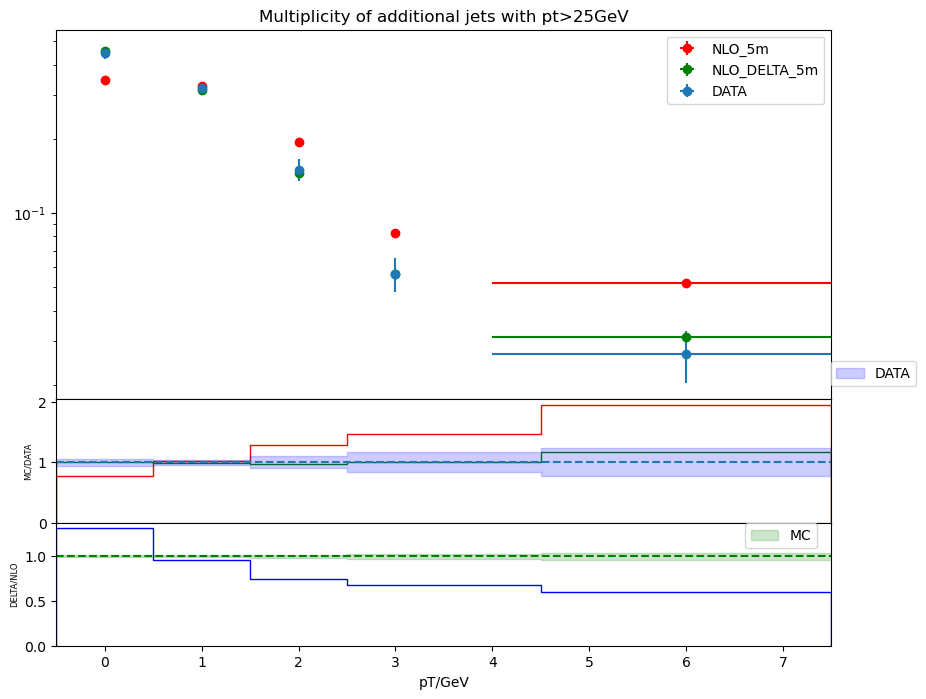

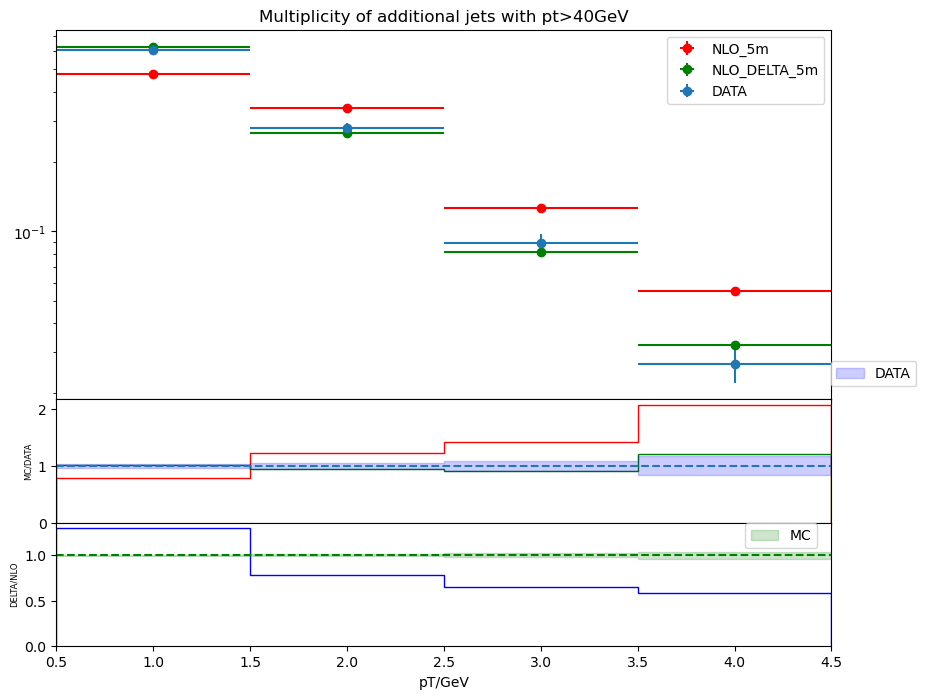

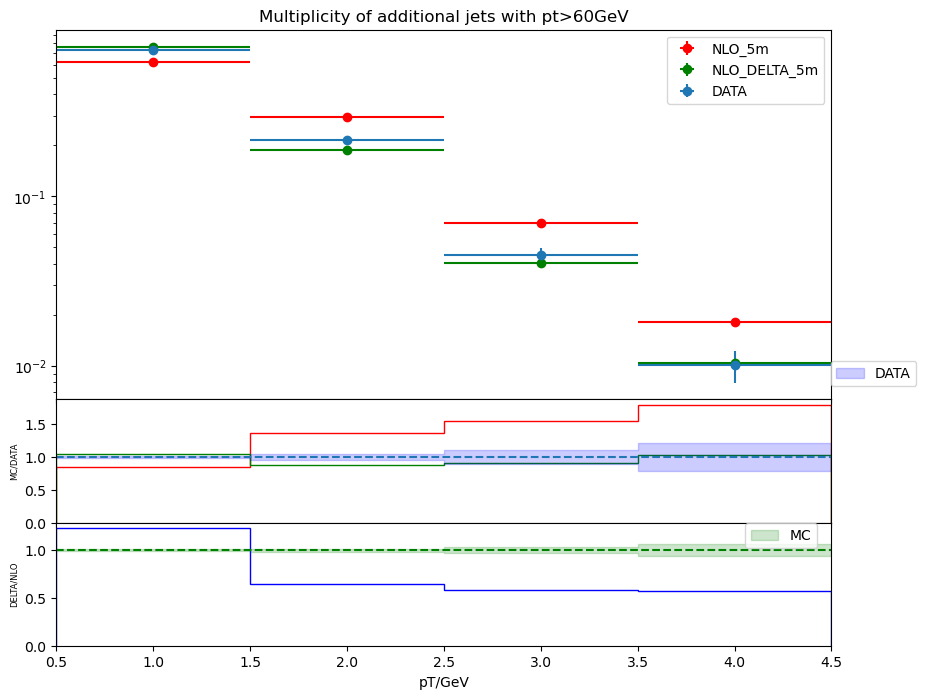

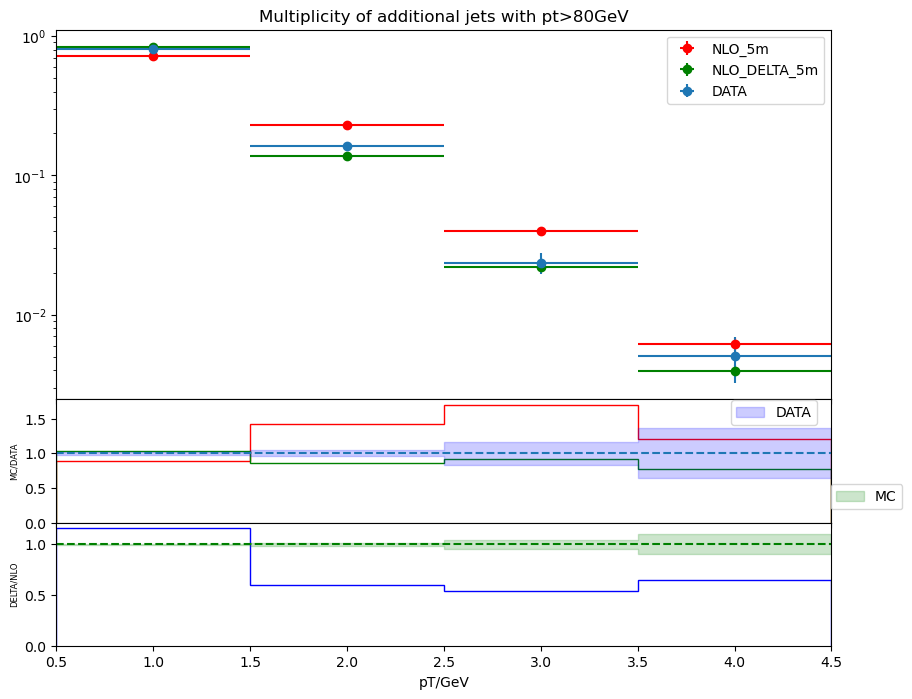

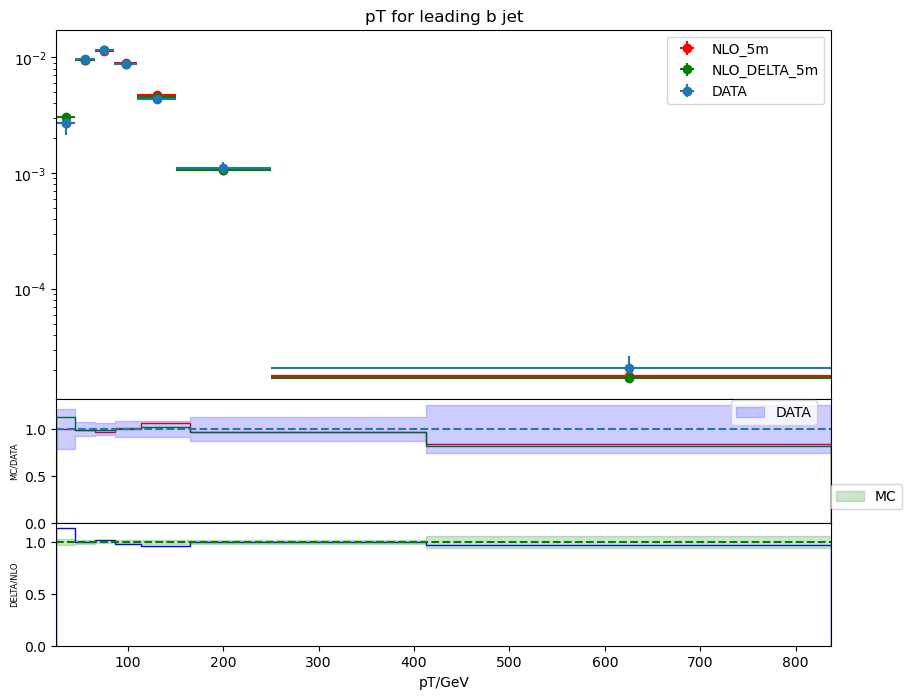

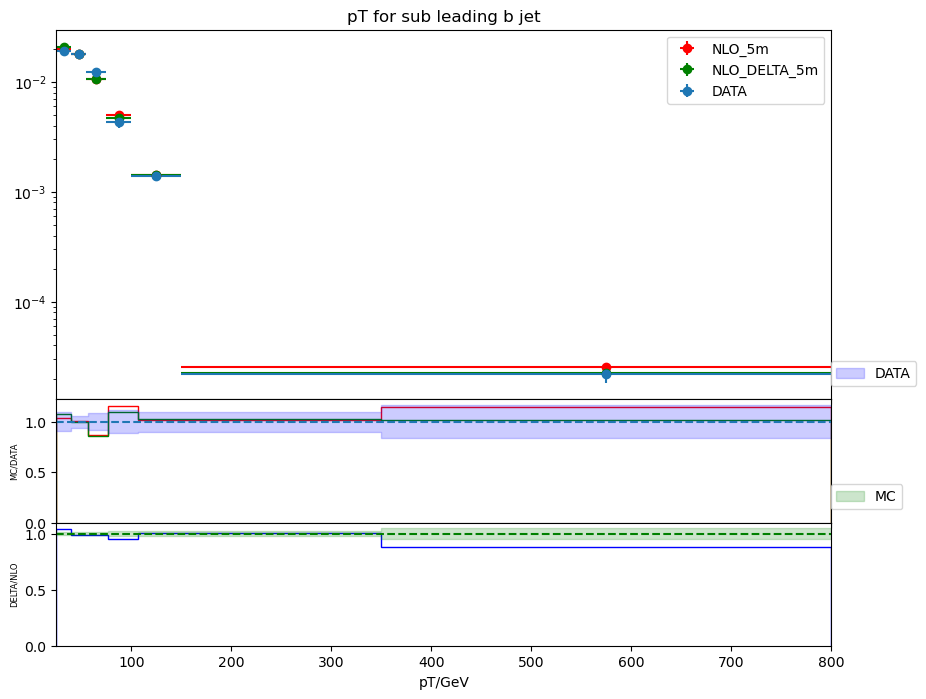

In [8]:
for i in range(len(table_type)):
    index = i+1
    DATA_file = root_path + 'NLO_1k' + Event + DATA + figure_pre + figure_type[i] + yoda_suff
    print(DATA_file)
    NLO_file   = root_path+'NLO_5m'+Event+'/NLO_5m_ATLAS_CMS'+yoda_suff # local event gen madspin is not the same as AthGen
    DELTA_file = root_path+'NLO_DELTA_5m'+Event+'/NLO_DELTA_5m_ATLAS_CMS'+yoda_suff 
    #NLO_file  = root_path+'BATCH'+'/NLO_5m_ATLAS_CMS'+yoda_suff # JO data including madspin
    #DELTA_file = root_path+'BATCH'+'/NLO_DELTA_5m_ATLAS_CMS'+yoda_suff # JO data including madspin
    MC_dict = DATA + '/d' + '%02d'%index + '-x01-y01'
    DATA_dict = '/REF' + DATA +  '/d' + '%02d'%index + '-x01-y01'
    plot_path = root_path + 'NLO_1k' + Event + '/python-plots' + DATA + DATA + '_' + plot_name[i] + '.png'
    #plot_path = root_path + 'BATCH/JO_plots/' + DATA + DATA + '_' + plot_name[i] + '_JO' + '.png'
    title =  plot_title[i]
    
    DATA_yoda = yoda.read(DATA_file)[DATA_dict]
    NLO = yoda.read(NLO_file)[MC_dict]
    DELTA=yoda.read(DELTA_file)[MC_dict]

    datax = DATA_yoda.xVals()
    datay = DATA_yoda.yVals()
    data_xerr = DATA_yoda.xErrs()[:,0]
    data_yerr = DATA_yoda.yErrs()[:,0]
    NLO_5m = NLO.yVals()
    NLO_yerr=NLO.yErrs()
    DELTA_5m = DELTA.yVals()
    DELTA_yerr=DELTA.yErrs()

    plotting(datax, datay, data_xerr, data_yerr, NLO_5m, NLO_yerr, DELTA_5m, DELTA_yerr, title, plot_path)

In [12]:
F1 = yoda.read('/sdf/group/ldmx/users/dongyi/data/NLO_1k/Events/run_01/ATLAS_2017_I1495243/HEPData-ins1495243-v2-Figure_6a.yoda')
F2 = yoda.read('/sdf/group/ldmx/users/dongyi/data/NLO_1k/Events/run_01/ATLAS_2017_I1495243/HEPData-ins1495243-v2-Figure_6b.yoda')
F3 = yoda.read('/sdf/group/ldmx/users/dongyi/data/NLO_1k/Events/run_01/ATLAS_2017_I1495243/HEPData-ins1495243-v2-Figure_4a.yoda')
F4 = yoda.read('/sdf/group/ldmx/users/dongyi/data/NLO_1k/Events/run_01/ATLAS_2017_I1495243/HEPData-ins1495243-v2-Figure_4b.yoda')
F5 = yoda.read('/sdf/group/ldmx/users/dongyi/data/NLO_1k/Events/run_01/ATLAS_2017_I1495243/HEPData-ins1495243-v2-Figure_4c.yoda')
F6 = yoda.read('/sdf/group/ldmx/users/dongyi/data/NLO_1k/Events/run_01/ATLAS_2017_I1495243/HEPData-ins1495243-v2-Figure_4d.yoda')

lead_bjet_DATA = F1['/REF/ATLAS_2017_I1495243/d05-x01-y01']
sub_lead_bjet_DATA = F2['/REF/ATLAS_2017_I1495243/d06-x01-y01']
ajet_pT25_DATA = F3['/REF/ATLAS_2017_I1495243/d01-x01-y01']
ajet_pT40_DATA = F4['/REF/ATLAS_2017_I1495243/d02-x01-y01']
ajet_pT60_DATA = F5['/REF/ATLAS_2017_I1495243/d03-x01-y01']
ajet_pT80_DATA = F6['/REF/ATLAS_2017_I1495243/d04-x01-y01']



In [13]:
f1 = yoda.read('/sdf/group/ldmx/users/dongyi/data/NLO_50k/Events/run_01/slurm_yoda/NLO_50k_DATA.yoda')
f2 = yoda.read('/sdf/group/ldmx/users/dongyi/data/NLO_DELTA_50k/Events/run_01/slurm_yoda/NLO_DELTA_50k.yoda')
f3 = yoda.read('/sdf/group/ldmx/users/dongyi/data/NLO_5m/Events/run_01/NLO_5m_DATA.yoda')
f4 = yoda.read('/sdf/group/ldmx/users/dongyi/data/NLO_DELTA_5m/Events/run_01/NLO_DELTA_5m_DATA.yoda')

lead_bjet_50k = f1['/ATLAS_2017_I1495243/d05-x01-y01']
lead_bjet_DELTA_50k = f2['/ATLAS_2017_I1495243/d05-x01-y01']
lead_bjet_5m = f3['/ATLAS_2017_I1495243/d05-x01-y01']
lead_bjet_DELTA_5m = f4['/ATLAS_2017_I1495243/d05-x01-y01']

sub_lead_bjet_50k = f1['/ATLAS_2017_I1495243/d06-x01-y01']
sub_lead_bjet_DELTA_50k = f2['/ATLAS_2017_I1495243/d06-x01-y01']
sub_lead_bjet_5m = f3['/ATLAS_2017_I1495243/d06-x01-y01']
sub_lead_bjet_DELTA_5m = f4['/ATLAS_2017_I1495243/d06-x01-y01']

ajet_pT25_50k = f1['/ATLAS_2017_I1495243/d01-x01-y01']
ajet_pT25_DELTA_50k = f2['/ATLAS_2017_I1495243/d01-x01-y01']
ajet_pT25_5m = f3['/ATLAS_2017_I1495243/d01-x01-y01']
ajet_pT25_DELTA_5m = f4['/ATLAS_2017_I1495243/d01-x01-y01']

ajet_pT40_50k = f1['/ATLAS_2017_I1495243/d02-x01-y01']
ajet_pT40_DELTA_50k = f2['/ATLAS_2017_I1495243/d02-x01-y01']
ajet_pT40_5m = f3['/ATLAS_2017_I1495243/d02-x01-y01']
ajet_pT40_DELTA_5m = f4['/ATLAS_2017_I1495243/d02-x01-y01']


ajet_pT60_50k = f1['/ATLAS_2017_I1495243/d03-x01-y01']
ajet_pT60_DELTA_50k = f2['/ATLAS_2017_I1495243/d03-x01-y01']
ajet_pT60_5m = f3['/ATLAS_2017_I1495243/d03-x01-y01']
ajet_pT60_DELTA_5m = f4['/ATLAS_2017_I1495243/d03-x01-y01']


ajet_pT80_50k = f1['/ATLAS_2017_I1495243/d04-x01-y01']
ajet_pT80_DELTA_50k = f2['/ATLAS_2017_I1495243/d04-x01-y01']
ajet_pT80_5m = f3['/ATLAS_2017_I1495243/d04-x01-y01']
ajet_pT80_DELTA_5m = f4['/ATLAS_2017_I1495243/d04-x01-y01']


print(ajet_pT25_50k.heights())

[0.3282707  0.3584515  0.1842155  0.06771004 0.06135224]


In [6]:
print((yErr))

[0.01395206 0.00696563 0.00402244 0.00183576]


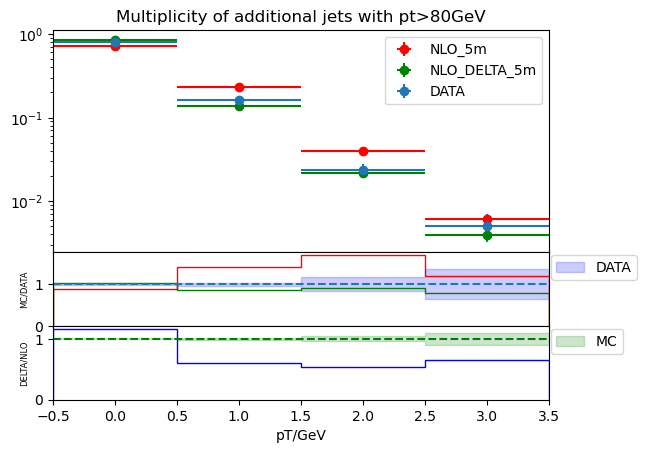

In [59]:
datax = [x-1 for x in ajet_pT60_DATA.xVals()]
datay = ajet_pT80_DATA.yVals()
xErr = ajet_pT80_DATA.xErrs()[:,0]
yErr = ajet_pT80_DATA.yErrs()[:,0]
xEdges = np.append(np.append(1.5*datax[0] - datax[1]*.5, [(datax[i] + datax[i+1])*.5 for i in range(len(datax)-1)]), 1.5*datax[-1]-.5*datax[-2])
NLO_50k = ajet_pT80_50k.heights()
DELTA_50k = ajet_pT80_DELTA_50k.heights()
NLO_5m = ajet_pT80_5m.heights()
DELTA_5m = ajet_pT80_DELTA_5m.heights()
NLO_xerr = np.array(ajet_pT80_5m.xErrs())[:,0]
NLO_yerr = ajet_pT80_5m.yErrs()
DELTA_xerr = np.array(ajet_pT80_DELTA_5m.xErrs())[:,0]
DELTA_yerr = ajet_pT80_DELTA_5m.yErrs()


fig, axs = plt.subplots(3, 1, sharex=True, gridspec_kw={'height_ratios':[3, 1, 1]})
fig.subplots_adjust(hspace=0)
#axs[0].plot(datax, NLO_50k, 'ro', label='NLO_50k')
#axs[0].plot(datax, DELTA_50k, 'go', label='NLO_DELTA_50k')
axs[0].errorbar(datax, NLO_5m, color = 'red', marker='o', linestyle='none', xerr=NLO_xerr, yerr=NLO_yerr, label='NLO_5m')
axs[0].errorbar(datax, DELTA_5m, color = 'green', marker='o', linestyle='none', xerr=DELTA_xerr, yerr=DELTA_yerr, label='NLO_DELTA_5m')
axs[0].errorbar(datax, datay, marker='o', linestyle='none', xerr=xErr, yerr=yErr, label='DATA')
#axs[0].set_xticks(datax)
#axs[0].set_ylim(1e-6, 1)
axs[0].set_xlim(-.5, 4)
axs[0].set_yscale('log')
#axs[0].set_xscale('log')
axs[0].legend()
axs[0].set_title('Multiplicity of additional jets with pt>80GeV')
axs[0].set_xlim(min(xEdges), max(xEdges))

#axs[1].stairs(NLO_50k/datay, xEdges, color='red')
#axs[1].stairs(DELTA_50k/datay, xEdges, color='green')
axs[1].stairs(NLO_5m/datay, xEdges, color='red')
axs[1].stairs(DELTA_5m/datay, xEdges, color='green')
axs[1].plot(xEdges, np.ones(len(xEdges)), '--')
axs[1].fill_between(xEdges, np.ones(len(xEdges))+np.append(yErr/datay,0),np.ones(len(xEdges))-np.append(yErr/datay,0), color='blue', alpha=0.2, step='post', label='DATA')
#axs[1].fill_between(xEdges, np.append(NLO_5m+NLO_yerr/NLO_5m,0),np.append(NLO_5m-NLO_yerr/NLO_5m,0), color='red', alpha=0.2, step='post', label='NLO')
axs[1].set_ylabel('MC/DATA', fontsize=6)
#axs[1].set_ylim(0.3, 1.5)
axs[1].legend(bbox_to_anchor=(.99, 1.05))


axs[2].stairs(DELTA_5m/NLO_5m, xEdges, color='blue')
axs[2].plot(xEdges, np.ones(len(xEdges)), 'g--')
axs[2].fill_between(xEdges, np.ones(len(xEdges))+np.append(DELTA_yerr/DELTA_5m,0),np.ones(len(xEdges))-np.append(DELTA_yerr/DELTA_5m,0), color='green', alpha=0.2, step='post', label='MC')
axs[2].set_ylabel('DELTA/NLO', fontsize=6)
axs[2].set_xlabel('pT/GeV')
axs[2].legend(bbox_to_anchor=(.99, 1.05))

fig.savefig('/sdf/group/ldmx/users/dongyi/data/NLO_1k/Events/run_01/python-plots/ATLAS_2017_I1495243/ajet_pT80.png', bbox_inches='tight', dpi=200)



In [60]:
datax = [x-1 for x in ajet_pT60_DATA.xVals()]
datay = ajet_pT60_DATA.yVals()
xErr = ajet_pT60_DATA.xErrs()[:,0]
yErr = ajet_pT60_DATA.yErrs()[:,0]
xEdges = np.append(np.append(1.5*datax[0] - datax[1]*.5, [(datax[i] + datax[i+1])*.5 for i in range(len(datax)-1)]), 1.5*datax[-1]-.5*datax[-2])
NLO_50k = ajet_pT60_50k.heights()
DELTA_50k = ajet_pT60_DELTA_50k.heights()
NLO_5m = ajet_pT60_5m.heights()
DELTA_5m = ajet_pT60_DELTA_5m.heights()
NLO_xerr = np.array(  ajet_pT60_5m.xErrs())[:,0]
NLO_yerr =            ajet_pT60_5m.yErrs()
DELTA_xerr = np.array(ajet_pT60_DELTA_5m.xErrs())[:,0]
DELTA_yerr =          ajet_pT60_DELTA_5m.yErrs()

fig, axs = plt.subplots(3, 1, sharex=True, gridspec_kw={'height_ratios':[3, 1, 1]})
fig.subplots_adjust(hspace=0)
#axs[0].plot(datax, NLO_50k, 'ro', label='NLO_50k')
#axs[0].plot(datax, DELTA_50k, 'go', label='NLO_DELTA_50k')
axs[0].errorbar(datax, NLO_5m, color = 'red', marker='o', linestyle='none', xerr=NLO_xerr, yerr=NLO_yerr, label='NLO_5m')
axs[0].errorbar(datax, DELTA_5m, color = 'green', marker='o', linestyle='none', xerr=DELTA_xerr, yerr=DELTA_yerr, label='NLO_DELTA_5m')
axs[0].errorbar(datax, datay, marker='o', linestyle='none', xerr=xErr, yerr=yErr, label='DATA')
#axs[0].set_xticks(datax)
#axs[0].set_ylim(1e-6, 1)
axs[0].set_xlim(-.5, 4)
axs[0].set_yscale('log')
#axs[0].set_xscale('log')
axs[0].legend()
axs[0].set_title('Multiplicity of additional jets with pt>60GeV')
axs[0].set_xlim(min(xEdges), max(xEdges))

#axs[1].stairs(NLO_50k/datay, xEdges, color='red')
#axs[1].stairs(DELTA_50k/datay, xEdges, color='green')
axs[1].stairs(NLO_5m/datay, xEdges, color='red')
axs[1].stairs(DELTA_5m/datay, xEdges, color='green')
axs[1].plot(xEdges, np.ones(len(xEdges)), '--')
axs[1].fill_between(xEdges, np.ones(len(xEdges))+np.append(yErr/datay,0),np.ones(len(xEdges))-np.append(yErr/datay,0), color='blue', alpha=0.2, step='post', label='DATA')
#axs[1].fill_between(xEdges, np.append(NLO_5m+NLO_yerr/NLO_5m,0),np.append(NLO_5m-NLO_yerr/NLO_5m,0), color='red', alpha=0.2, step='post', label='NLO')
axs[1].set_ylabel('MC/DATA', fontsize=6)
#axs[1].set_ylim(0.3, 1.5)
axs[1].legend(bbox_to_anchor=(.99, 1.05))


axs[2].stairs(DELTA_5m/NLO_5m, xEdges, color='blue')
axs[2].plot(xEdges, np.ones(len(xEdges)), 'g--')
axs[2].fill_between(xEdges, np.ones(len(xEdges))+np.append(DELTA_yerr/DELTA_5m,0),np.ones(len(xEdges))-np.append(DELTA_yerr/DELTA_5m,0), color='green', alpha=0.2, step='post', label='MC')
axs[2].set_ylabel('DELTA/NLO', fontsize=6)
axs[2].set_xlabel('pT/GeV')
axs[2].legend(bbox_to_anchor=(.99, 1.05))

fig.savefig('/sdf/group/ldmx/users/dongyi/data/NLO_1k/Events/run_01/python-plots/ATLAS_2017_I1495243/ajet_pT60.png', bbox_inches='tight', dpi=200)


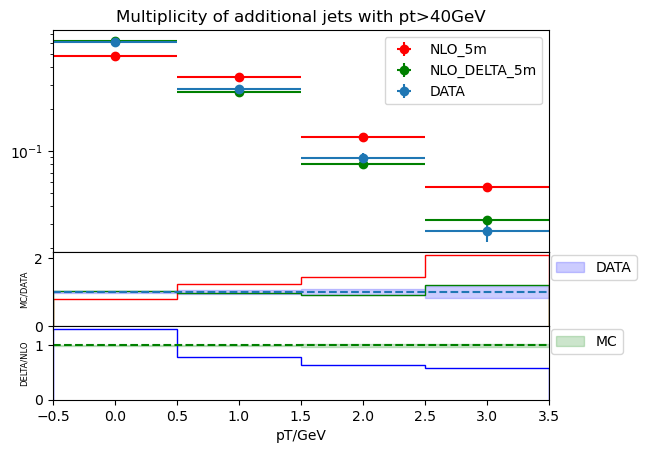

In [64]:
datax = [x-1 for x in ajet_pT40_DATA.xVals()]
datay = ajet_pT40_DATA.yVals()
xErr = ajet_pT40_DATA.xErrs()[:,0]
yErr = ajet_pT40_DATA.yErrs()[:,0]
xEdges = np.append(np.append(1.5*datax[0] - datax[1]*.5, [(datax[i] + datax[i+1])*.5 for i in range(len(datax)-1)]), 1.5*datax[-1]-.5*datax[-2])
NLO_50k = ajet_pT40_50k.heights()
DELTA_50k = ajet_pT40_DELTA_50k.heights()
NLO_5m = ajet_pT40_5m.heights()
DELTA_5m = ajet_pT40_DELTA_5m.heights()
NLO_xerr = np.array(  ajet_pT40_5m.xErrs())[:,0]
NLO_yerr =            ajet_pT40_5m.yErrs()
DELTA_xerr = np.array(ajet_pT40_DELTA_5m.xErrs())[:,0]
DELTA_yerr =          ajet_pT40_DELTA_5m.yErrs()

fig, axs = plt.subplots(3, 1, sharex=True, gridspec_kw={'height_ratios':[3, 1, 1]})
fig.subplots_adjust(hspace=0)
#axs[0].plot(datax, NLO_50k, 'ro', label='NLO_50k')
#axs[0].plot(datax, DELTA_50k, 'go', label='NLO_DELTA_50k')
axs[0].errorbar(datax, NLO_5m, color = 'red', marker='o', linestyle='none', xerr=NLO_xerr, yerr=NLO_yerr, label='NLO_5m')
axs[0].errorbar(datax, DELTA_5m, color = 'green', marker='o', linestyle='none', xerr=DELTA_xerr, yerr=DELTA_yerr, label='NLO_DELTA_5m')
axs[0].errorbar(datax, datay, marker='o', linestyle='none', xerr=xErr, yerr=yErr, label='DATA')
#axs[0].set_xticks(datax)
#axs[0].set_ylim(1e-6, 1)
axs[0].set_xlim(-.5, 4)
axs[0].set_yscale('log')
#axs[0].set_xscale('log')
axs[0].legend()
axs[0].set_title('Multiplicity of additional jets with pt>40GeV')
axs[0].set_xlim(min(xEdges), max(xEdges))

#axs[1].stairs(NLO_50k/datay, xEdges, color='red')
#axs[1].stairs(DELTA_50k/datay, xEdges, color='green')
axs[1].stairs(NLO_5m/datay, xEdges, color='red')
axs[1].stairs(DELTA_5m/datay, xEdges, color='green')
axs[1].plot(xEdges, np.ones(len(xEdges)), '--')
axs[1].fill_between(xEdges, np.ones(len(xEdges))+np.append(yErr/datay,0),np.ones(len(xEdges))-np.append(yErr/datay,0), color='blue', alpha=0.2, step='post', label='DATA')
#axs[1].fill_between(xEdges, np.append(NLO_5m+NLO_yerr/NLO_5m,0),np.append(NLO_5m-NLO_yerr/NLO_5m,0), color='red', alpha=0.2, step='post', label='NLO')
axs[1].set_ylabel('MC/DATA', fontsize=6)
#axs[1].set_ylim(0.3, 1.5)
axs[1].legend(bbox_to_anchor=(.99, 1.05))


axs[2].stairs(DELTA_5m/NLO_5m, xEdges, color='blue')
axs[2].plot(xEdges, np.ones(len(xEdges)), 'g--')
axs[2].fill_between(xEdges, np.ones(len(xEdges))+np.append(DELTA_yerr/DELTA_5m,0),np.ones(len(xEdges))-np.append(DELTA_yerr/DELTA_5m,0), color='green', alpha=0.2, step='post', label='MC')
axs[2].set_ylabel('DELTA/NLO', fontsize=6)
axs[2].set_xlabel('pT/GeV')
axs[2].legend(bbox_to_anchor=(.99, 1.05))

fig.savefig('/sdf/group/ldmx/users/dongyi/data/NLO_1k/Events/run_01/python-plots/ATLAS_2017_I1495243/ajet_pT40.png', bbox_inches='tight', dpi=200)


In [19]:
print(xErr)

[0. 0. 0. 0. 2.]


In [18]:
datax = ajet_pT25_DATA.xVals()
datay = ajet_pT25_DATA.yVals()
xErr = ajet_pT25_DATA.xErrs()[:,0]
yErr = ajet_pT25_DATA.yErrs()[:,0]
xEdges = np.append(np.append(1.5*datax[0] - datax[1]*.5, [(datax[i] + datax[i+1])*.5 for i in range(len(datax)-1)]), 1.5*datax[-1]-.5*datax[-2])
NLO_50k = ajet_pT25_50k.heights()
DELTA_50k = ajet_pT25_DELTA_50k.heights()
NLO_5m = ajet_pT25_5m.heights()
DELTA_5m = ajet_pT25_DELTA_5m.heights()
NLO_xerr = np.array(  ajet_pT25_5m.xErrs())[:,0]
NLO_yerr =            ajet_pT25_5m.yErrs()
DELTA_xerr = np.array(ajet_pT25_DELTA_5m.xErrs())[:,0]
DELTA_yerr =          ajet_pT25_DELTA_5m.yErrs()

fig, axs = plt.subplots(3, 1, sharex=True, gridspec_kw={'height_ratios':[3, 1, 1]})
fig.subplots_adjust(hspace=0)
#axs[0].plot(datax, NLO_50k, 'ro', label='NLO_50k')
#axs[0].plot(datax, DELTA_50k, 'go', label='NLO_DELTA_50k')
axs[0].errorbar(datax, NLO_5m, color = 'red', marker='o', linestyle='none', xerr=NLO_xerr, yerr=NLO_yerr, label='NLO_5m')
axs[0].errorbar(datax, DELTA_5m, color = 'green', marker='o', linestyle='none', xerr=DELTA_xerr, yerr=DELTA_yerr, label='NLO_DELTA_5m')
axs[0].errorbar(datax, datay, marker='o', linestyle='none', xerr=xErr, yerr=yErr, label='DATA')
#axs[0].set_xticks(datax)
#axs[0].set_ylim(1e-6, 1)
axs[0].set_xlim(-.5, 4)
axs[0].set_yscale('log')
#axs[0].set_xscale('log')
axs[0].legend()
axs[0].set_title('Multiplicity of additional jets with pt>25GeV')
axs[0].set_xlim(min(xEdges), max(xEdges))

#axs[1].stairs(NLO_50k/datay, xEdges, color='red')
#axs[1].stairs(DELTA_50k/datay, xEdges, color='green')
axs[1].stairs(NLO_5m/datay, xEdges, color='red')
axs[1].stairs(DELTA_5m/datay, xEdges, color='green')
axs[1].plot(xEdges, np.ones(len(xEdges)), '--')
axs[1].fill_between(xEdges, np.ones(len(xEdges))+np.append(yErr/datay,0),np.ones(len(xEdges))-np.append(yErr/datay,0), color='blue', alpha=0.2, step='post', label='DATA')
#axs[1].fill_between(xEdges, np.append(NLO_5m+NLO_yerr/NLO_5m,0),np.append(NLO_5m-NLO_yerr/NLO_5m,0), color='red', alpha=0.2, step='post', label='NLO')
axs[1].set_ylabel('MC/DATA', fontsize=6)
#axs[1].set_ylim(0.3, 1.5)
axs[1].legend(bbox_to_anchor=(.99, 1.05))


axs[2].stairs(DELTA_5m/NLO_5m, xEdges, color='blue')
axs[2].plot(xEdges, np.ones(len(xEdges)), 'g--')
axs[2].fill_between(xEdges, np.ones(len(xEdges))+np.append(DELTA_yerr/DELTA_5m,0),np.ones(len(xEdges))-np.append(DELTA_yerr/DELTA_5m,0), color='green', alpha=0.2, step='post', label='MC')
axs[2].set_ylabel('DELTA/NLO', fontsize=6)
axs[2].set_xlabel('pT/GeV')
axs[2].legend(bbox_to_anchor=(.99, 1.05))

fig.savefig('/sdf/group/ldmx/users/dongyi/data/NLO_1k/Events/run_01/python-plots/ATLAS_2017_I1495243/ajet_pT25.png', bbox_inches='tight', dpi=200)




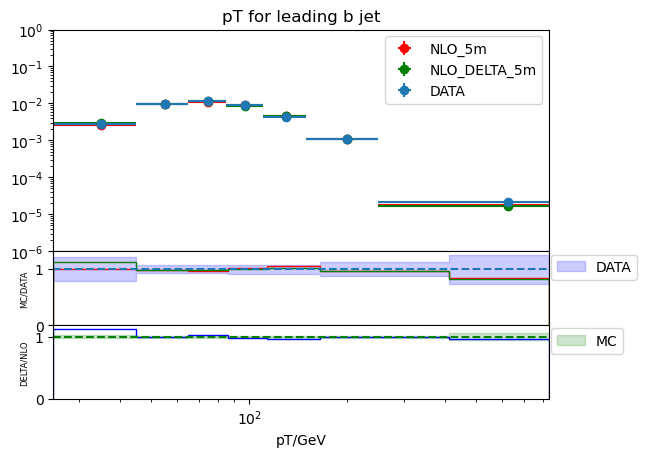

In [65]:
datax = lead_bjet_DATA.xVals()
datay = lead_bjet_DATA.yVals()
xErr = lead_bjet_DATA.xErrs()[:,0]
yErr = lead_bjet_DATA.yErrs()[:,0]
xEdges = np.append(np.append(1.5*datax[0] - datax[1]*.5, [(datax[i] + datax[i+1])*.5 for i in range(len(datax)-1)]), 1.5*datax[-1]-.5*datax[-2])
NLO_50k = lead_bjet_50k.heights()
DELTA_50k = lead_bjet_DELTA_50k.heights()
NLO_5m = lead_bjet_5m.heights()
DELTA_5m = lead_bjet_DELTA_5m.heights()
NLO_xerr = np.array(  lead_bjet_5m.xErrs())[:,0]
NLO_yerr =            lead_bjet_5m.yErrs()
DELTA_xerr = np.array(lead_bjet_DELTA_5m.xErrs())[:,0]
DELTA_yerr =          lead_bjet_DELTA_5m.yErrs()

fig, axs = plt.subplots(3, 1, sharex=True, gridspec_kw={'height_ratios':[3, 1, 1]})
fig.subplots_adjust(hspace=0)
#axs[0].plot(datax, NLO_50k, 'ro', label='NLO_50k')
#axs[0].plot(datax, DELTA_50k, 'go', label='NLO_DELTA_50k')
axs[0].errorbar(datax, NLO_5m, color = 'red', marker='o', linestyle='none', xerr=NLO_xerr, yerr=NLO_yerr, label='NLO_5m')
axs[0].errorbar(datax, DELTA_5m, color = 'green', marker='o', linestyle='none', xerr=DELTA_xerr, yerr=DELTA_yerr, label='NLO_DELTA_5m')
axs[0].errorbar(datax, datay, marker='o', linestyle='none', xerr=xErr, yerr=yErr, label='DATA')
axs[0].set_xticks(datax)
axs[0].set_ylim(1e-6, 1)
axs[0].set_xlim(25, 1000)
axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[0].legend()
axs[0].set_title('pT for leading b jet')
axs[0].set_xlim(min(xEdges), max(xEdges))

#axs[1].stairs(NLO_50k/datay, xEdges, color='red')
#axs[1].stairs(DELTA_50k/datay, xEdges, color='green')
axs[1].stairs(NLO_5m/datay, xEdges, color='red')
axs[1].stairs(DELTA_5m/datay, xEdges, color='green')
axs[1].plot(xEdges, np.ones(len(xEdges)), '--')
axs[1].fill_between(xEdges, np.ones(len(xEdges))+np.append(yErr/datay,0),np.ones(len(xEdges))-np.append(yErr/datay,0), color='blue', alpha=0.2, step='post', label='DATA')
#axs[1].fill_between(xEdges, np.append(NLO_5m+NLO_yerr/NLO_5m,0),np.append(NLO_5m-NLO_yerr/NLO_5m,0), color='red', alpha=0.2, step='post', label='NLO')
axs[1].set_ylabel('MC/DATA', fontsize=6)
#axs[1].set_ylim(0.3, 1.5)
axs[1].legend(bbox_to_anchor=(.99, 1.05))


axs[2].stairs(DELTA_5m/NLO_5m, xEdges, color='blue')
axs[2].plot(xEdges, np.ones(len(xEdges)), 'g--')
axs[2].fill_between(xEdges, np.ones(len(xEdges))+np.append(DELTA_yerr/DELTA_5m,0),np.ones(len(xEdges))-np.append(DELTA_yerr/DELTA_5m,0), color='green', alpha=0.2, step='post', label='MC')
axs[2].set_ylabel('DELTA/NLO', fontsize=6)
axs[2].set_xlabel('pT/GeV')
axs[2].legend(bbox_to_anchor=(.99, 1.05))

fig.savefig('/sdf/group/ldmx/users/dongyi/data/NLO_1k/Events/run_01/python-plots/ATLAS_2017_I1495243/lead_bjet.png', bbox_inches='tight', dpi=200)


#plt.grid()

In [ ]:
datax = sub_lead_bjet_DATA.xVals()
datay = sub_lead_bjet_DATA.yVals()
xErr = sub_lead_bjet_DATA.xErrs()[:,0]
yErr = sub_lead_bjet_DATA.yErrs()[:,0]
xEdges = np.append(np.append(1.5*datax[0] - datax[1]*.5, [(datax[i] + datax[i+1])*.5 for i in range(len(datax)-1)]), 1.5*datax[-1]-.5*datax[-2])
NLO_50k = sub_lead_bjet_50k.heights()
DELTA_50k = sub_lead_bjet_DELTA_50k.heights()
NLO_5m = sub_lead_bjet_5m.heights()
DELTA_5m = sub_lead_bjet_DELTA_5m.heights()
NLO_xerr = np.array(  sub_lead_bjet_5m.xErrs())[:,0]
NLO_yerr =            sub_lead_bjet_5m.yErrs()
DELTA_xerr = np.array(sub_lead_bjet_DELTA_5m.xErrs())[:,0]
DELTA_yerr =          sub_lead_bjet_DELTA_5m.yErrs()


fig, axs = plt.subplots(3, 1, sharex=True, gridspec_kw={'height_ratios':[3, 1, 1]})
fig.subplots_adjust(hspace=0)
#axs[0].plot(datax, NLO_50k, 'ro', label='NLO_50k')
#axs[0].plot(datax, DELTA_50k, 'go', label='NLO_DELTA_50k')
axs[0].errorbar(datax, NLO_5m, color = 'red', marker='o', linestyle='none', xerr=NLO_xerr, yerr=NLO_yerr, label='NLO_5m')
axs[0].errorbar(datax, DELTA_5m, color = 'green', marker='o', linestyle='none', xerr=DELTA_xerr, yerr=DELTA_yerr, label='NLO_DELTA_5m')
axs[0].errorbar(datax, datay, marker='o', linestyle='none', xerr=xErr, yerr=yErr, label='DATA')
axs[0].set_xticks(datax)
axs[0].set_ylim(1e-6, 1)
axs[0].set_xlim(25, 1000)
axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[0].legend()
axs[0].set_xlim(min(xEdges), max(xEdges))
axs[0].set_title('pT for sub leading b jet')

#axs[1].stairs(NLO_50k/datay, xEdges, color='red')
#axs[1].stairs(DELTA_50k/datay, xEdges, color='green')
axs[1].stairs(NLO_5m/datay, xEdges, color='red')
axs[1].stairs(DELTA_5m/datay, xEdges, color='green')
axs[1].plot(xEdges, np.ones(len(xEdges)), '--')
axs[1].fill_between(xEdges, np.ones(len(xEdges))+np.append(yErr/datay,0),np.ones(len(xEdges))-np.append(yErr/datay,0), color='blue', alpha=0.2, step='post', label='DATA')
#axs[1].fill_between(xEdges, np.append(NLO_5m+NLO_yerr/NLO_5m,0),np.append(NLO_5m-NLO_yerr/NLO_5m,0), color='red', alpha=0.2, step='post', label='NLO')
axs[1].set_ylabel('MC/DATA', fontsize=6)
#axs[1].set_ylim(0.3, 1.5)
axs[1].legend(bbox_to_anchor=(.99, 1.05))


axs[2].stairs(DELTA_5m/NLO_5m, xEdges, color='blue')
axs[2].plot(xEdges, np.ones(len(xEdges)), 'g--')
axs[2].fill_between(xEdges, np.ones(len(xEdges))+np.append(DELTA_yerr/DELTA_5m,0),np.ones(len(xEdges))-np.append(DELTA_yerr/DELTA_5m,0), color='green', alpha=0.2, step='post', label='MC')
axs[2].set_ylabel('DELTA/NLO', fontsize=6)
axs[2].set_xlabel('pT/GeV')
axs[2].legend(bbox_to_anchor=(.99, 1.05))

fig.savefig('/sdf/group/ldmx/users/dongyi/data/NLO_1k/Events/run_01/python-plots/ATLAS_2017_I1495243/sub_lead_bjet.png', bbox_inches='tight', dpi=200)
#plt.grid()

In [14]:
axs[1].fill_between(xEdges, np.ones(len(xEdges))+np.append(yErr/datay,0),np.ones(len(xEdges))-np.append(yErr/datay,0), color='darkblue', alpha=0.2, step='post', label='stat')
print(datax[:-1])
print(np.ones(len(datax))+yErr/datay)
#plt.xlim(0, 1000)

[ 32.5  47.5  65.   87.5 125. ]
[1.09316948 1.05938631 1.08302927 1.11627907 1.10101529 1.16388868]
